<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/Lendenclub_investment_NLP_STATS_KEYWORDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/MyDrive/ACESS DATA/APP REVIEWS/APP SCRAPING/lendenclubinvestor.csv')

In [7]:
df.head()

,content,sentiment,reviews_score
0,This app is easy to use and has a very user fr...,positive,5
1,"Able to find only add funds to portfolio, no o...",neutral,1
2,It is one of the best apps for P2P investments...,positive,5
3,LenDen Club fits my definition of a platform b...,positive,5
4,Great platform for people who are just startin...,positive,5


In [8]:
df.shape

(2236, 3)

In [9]:
df.columns

Index(['content', 'sentiment', 'reviews_score'], dtype='object')

In [10]:
df=df.loc[df['sentiment'] == 'negative']

In [11]:
df.shape

(458, 3)

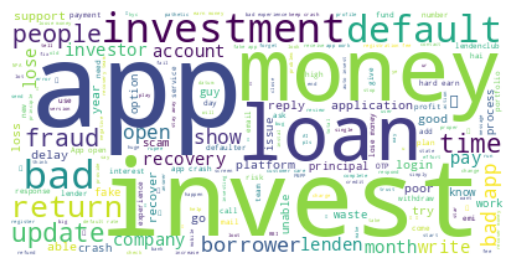

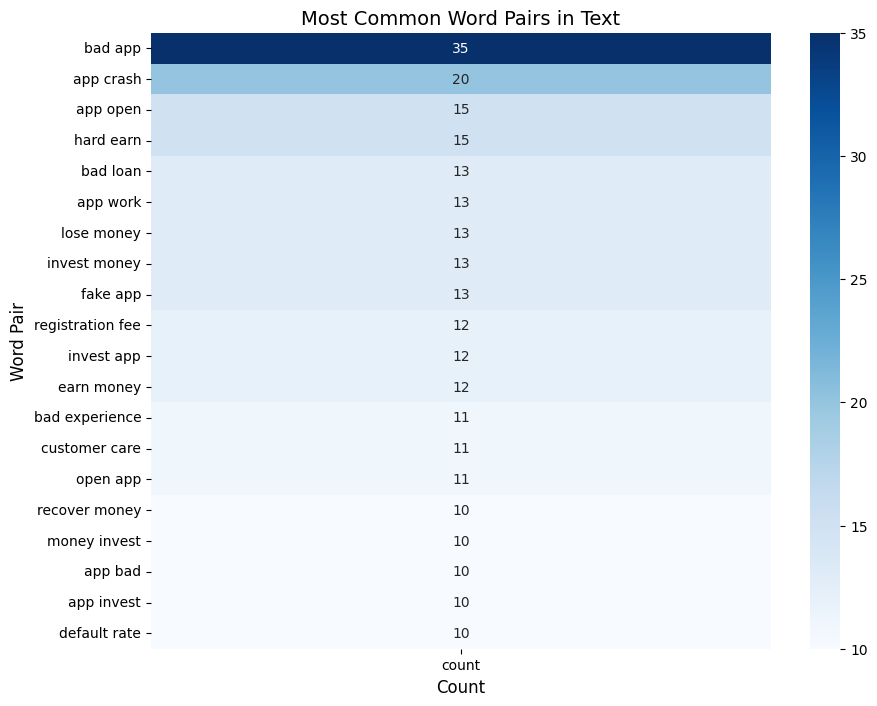

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyth

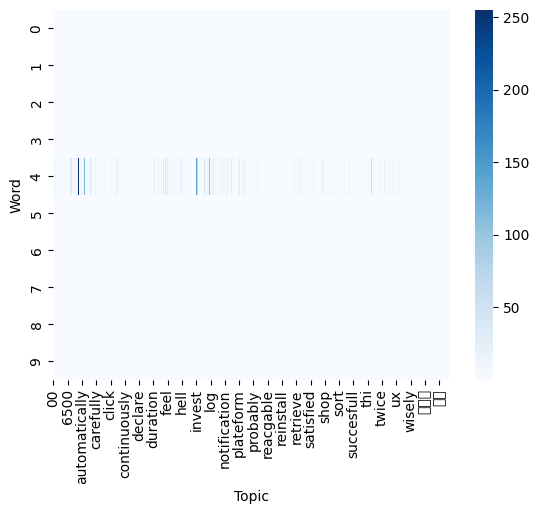

In [12]:
import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
from itertools import combinations

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Load the reviews into a pandas DataFrame
df = df

# Define a function to lemmatize text
def lemmatize(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(lemmas)

# Lemmatize the review column
df['review_lemmatized'] = df['content'].apply(lemmatize)

# Define a function to get the sentiment of text
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Get the sentiment of the review column
df['sentiment'] = df['content'].apply(get_sentiment)

# Define a function to get the entities in text
def get_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Get the entities in the review column
df['entities'] = df['content'].apply(get_entities)

# Define a function to create a word cloud from text
def create_wordcloud(text):
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Create a word cloud of the most common words in the review column
text = ' '.join(df['review_lemmatized'])
create_wordcloud(text)

# Define a function to create a heatmap of the most common word combinations in text
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Define a function to create a heatmap of the most common word combinations in text
def create_heatmap(text):
    vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000, stop_words='english')
    X = vectorizer.fit_transform([text])
    word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    word_freq_df = word_freq_df.transpose()
    word_freq_df.columns = ['count']
    word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
    top_word_pairs = word_freq_df.head(20)
    plt.figure(figsize=(10,8))
    sns.heatmap(top_word_pairs, cmap='Blues', annot=True)
    plt.title('Most Common Word Pairs in Text', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Word Pair', fontsize=12)
    plt.show()


# Create a heatmap of the most common word pairs in the review column
create_heatmap(text)

# Define a function to perform topic modeling on text
def perform_topic_modeling(text):
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform([text])
    lda = LatentDirichletAllocation(n_components=10, random_state=42)
    lda.fit(X)
    topic_words = vectorizer.get_feature_names_out()
    topic_word_distributions = pd.DataFrame(lda.components_, columns=topic_words)
    sns.heatmap(topic_word_distributions, cmap='Blues')
    plt.xlabel('Topic')
    plt.ylabel('Word')
    plt.show()

# Perform topic modeling on the review column
perform_topic_modeling(text)

